In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
##lets create a synthetic data

from sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000,n_features=2,n_classes=2, \
                random_state=60,n_clusters_per_class=1,n_redundant=0)

In [3]:
X_train,X_test,y_train,y_test=train_test_split   \
      (X,y,test_size=0.25,random_state=1)

In [4]:
X

array([[ 1.55357352,  0.06693114],
       [-1.10030105, -1.85920588],
       [ 1.21632114, -1.28854107],
       ...,
       [ 1.38827312, -1.26665989],
       [-1.10220114, -1.40868735],
       [ 0.23213816,  0.01445818]])

In [5]:
pd.DataFrame(X)[0].head()

0    1.553574
1   -1.100301
2    1.216321
3    1.920779
4   -1.150954
Name: 0, dtype: float64

<Axes: xlabel='0', ylabel='1'>

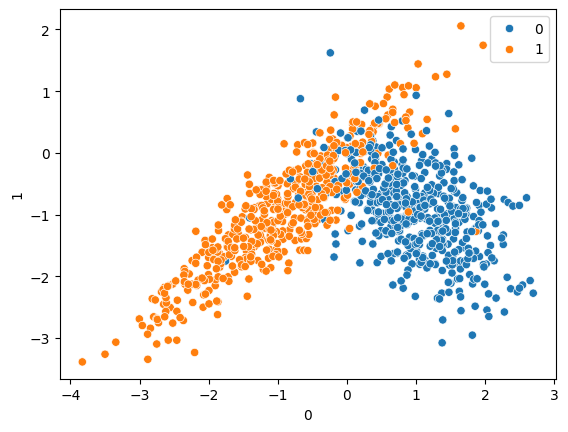

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.svm import SVC

svc=SVC(kernel="linear")

svc.fit(X_train,y_train)



SVC(kernel='linear')

In [8]:
y_pred=svc.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       129
           1       0.85      0.97      0.91       121

    accuracy                           0.90       250
   macro avg       0.91      0.91      0.90       250
weighted avg       0.91      0.90      0.90       250

[[109  20]
 [  4 117]]


In [11]:
svc=SVC(kernel="rbf")

svc.fit(X_train,y_train)

SVC()

In [12]:
y_pred=svc.predict(X_test)

In [13]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       129
           1       0.89      0.96      0.92       121

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[114  15]
 [  5 116]]


In [14]:
svc=SVC(kernel="poly")

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83       129
           1       0.76      0.98      0.86       121

    accuracy                           0.84       250
   macro avg       0.87      0.85      0.84       250
weighted avg       0.87      0.84      0.84       250

[[ 92  37]
 [  2 119]]


In [15]:
svc=SVC(kernel="sigmoid")

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       129
           1       0.87      0.92      0.90       121

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[113  16]
 [ 10 111]]


In [16]:
#parameter tyning

param_grid={ "C": [0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
             "kernel":['rbf','linear','poly','sigmoid']}



In [17]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,refit=True,verbose=3)

In [18]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.887 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [19]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [20]:
grid.best_score_

0.9266666666666665

In [21]:
#svc=SVC(kernel="rbf")

#svc.fit(X_train,y_train)

y_pred=grid.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91       129
           1       0.88      0.96      0.92       121

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113  16]
 [  5 116]]


**SVM Kernel Implementation**

In [22]:
import numpy as np
import matplotlib.pyplot as plt



In [42]:
x=np.linspace(-5.0,5.0,100)
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [43]:
y=np.sqrt([10**2-x**2])
y

array([[8.66025404, 8.71779204, 8.77378994, 8.82827705, 8.88128118,
        8.93282873, 8.98294476, 9.03165312, 9.07897646, 9.12493632,
        9.16955321, 9.21284664, 9.25483518, 9.29553652, 9.3349675 ,
        9.37314414, 9.41008171, 9.44579475, 9.4802971 , 9.51360192,
        9.54572176, 9.57666854, 9.60645359, 9.63508769, 9.66258107,
        9.68894344, 9.714184  , 9.73831149, 9.76133416, 9.7832598 ,
        9.80409577, 9.82384901, 9.84252604, 9.86013297, 9.87667553,
        9.89215905, 9.90658851, 9.91996849, 9.93230325, 9.94359667,
        9.9538523 , 9.96307334, 9.97126266, 9.9784228 , 9.98455598,
        9.98966408, 9.99374868, 9.99681104, 9.99885209, 9.99987246,
        9.99987246, 9.99885209, 9.99681104, 9.99374868, 9.98966408,
        9.98455598, 9.9784228 , 9.97126266, 9.96307334, 9.9538523 ,
        9.94359667, 9.93230325, 9.91996849, 9.90658851, 9.89215905,
        9.87667553, 9.86013297, 9.84252604, 9.82384901, 9.80409577,
        9.7832598 , 9.76133416, 9.73831149, 9.71

In [44]:
#Stack arrays in sequence horizontally (column wise).
y=np.hstack([y,-y])
y

array([[ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
         8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
         9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
         9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
         9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
         9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
         9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
         9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
         9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
         9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
         9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
         9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
         9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
         9.87667553,  9.86013297,  9.84252604,  9.8

In [45]:
x=np.hstack([x,-x])
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [46]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])


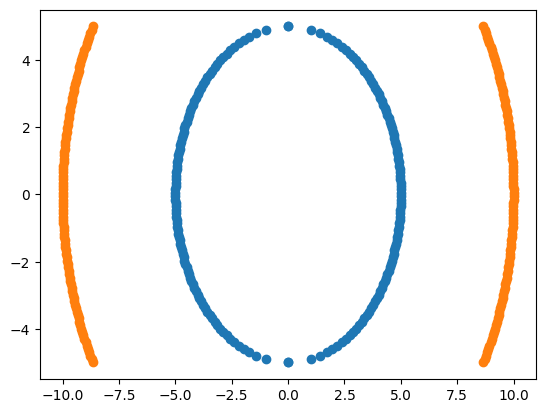

In [47]:
plt.scatter(y1,x1)
plt.scatter(y,x)

In [48]:
import pandas as pd

In [50]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0

df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1

df=pd.concat([df1,df2])
df.head(5)



,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [51]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [53]:
#independent and dependent features

X=df.iloc[:,:2]
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [54]:
y=df.Y
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [56]:
#split the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, \
                                random_state=10)

Polynomial Kernel

In [58]:
# we need to find components for the polynomial kernel

#X1,X2,X1_Square,X2_Square, X1*X2

df['X1_Square']=df['X1']**2

df['X2_Square']=df['X2']**2

df['X1*X2']=(df['X1']*df['X2'])

df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [60]:
#Independent and dependent features

X=df[['X1','X2','X1_Square','X2_Square',"X1*X2"]]
y=df["Y"]

In [61]:
#split the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, \
                                random_state=10)

In [62]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
57,9.971263,0.757576,99.426079,0.573921,7.553987
87,9.254835,3.787879,85.651974,14.348026,35.056194
157,-4.942275,-0.757576,24.426079,0.573921,3.744147
155,-4.969040,-0.555556,24.691358,0.308642,2.760578
38,4.863193,-1.161616,23.650648,1.349352,-5.649164
...,...,...,...,...,...
169,-4.595682,-1.969697,21.120294,3.879706,9.052101
120,-4.015072,2.979798,16.120804,8.879196,-11.964104
15,9.373144,-3.484848,87.855831,12.144169,-32.663987
125,-9.688943,2.474747,93.875625,6.124375,-23.977688


In [64]:
import plotly.express as px

fig=px.scatter_3d(df,x="X1",y="X2",z="X1*X2",\
                  color='Y')

fig.show()

In [66]:
import plotly.express as px

fig=px.scatter_3d(df,x="X1_Square",y="X2_Square",z="X1*X2",\
                  color='Y')

fig.show()

In [70]:
classifier=SVC(kernel="linear")

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        44

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [72]:
classifier=SVC(kernel="poly")

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        44

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [73]:
classifier=SVC(kernel="rbf")

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        44

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [74]:
classifier=SVC(kernel="sigmoid")

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        44

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

